<a href="https://colab.research.google.com/github/maryamdarei/CNN/blob/main/final_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CNN Model With PyTorch For Image Classification



# ***Image size is 256X256*** 
#*epochs number is 20* 
# *Data set is Herbarium Challenge 2019, small data set.**#

A convolutional neural network (CNN) takes an input image and classifies it into any of the output classes. Each image
passes through a series of different layers – primarily convolutional layers, pooling layers, and fully connected layers.
The convolutional layer is used to extract features from the input image. It is a mathematical operation between the
input image and the kernel (filter). The filter is passed through the image and the output is calculated.
PyTorch is one of the most popular and widely used deep learning libraries – especially within academic research. It's an
open-source machine learning framework that accelerates the path from research prototyping to production deployment
and I'll be using it in this practice to create my first CNN.
In this work, I started with 32x32 images and I got 4% acc in my first step. I increase the image size to 20X20 and the
accuracy elevated to 20% which was not enough good yet. I am pretty sure this low accuracy was because of the low
amount of data and a large number of classes. There were 34255 images and 683 classes.
In the second step, I decided to do data augmentation and increase the size of the data training set.

In [3]:
# CNN Model With PyTorch For Image Classification
# Load in relevant libraries, and alias where appropriate
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torchvision import transforms
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt
from PIL import Image
import sys
import os
import glob
import cv2


# *Data Augmentation:*
flip horizontally and vertically
Image augmentation is one useful technique in building convolutional neural networks that can increase the size of the
training set without acquiring new images. The idea is simple; duplicate images with some kind of variation so the model
can learn from more examples. I use the OpenCV library to increase the number of my data training set images with flip
horizontally and vertically and also rotating 90-degree methods.
My previous training set has almost 34000 images and after data Augmentation, it increased to more than 270000
images, almost 8 times.

In [ ]:

# Data Augmentation:
# flip horizontally and vertically, Resize to 128X128
imageSize = 256
print(torch.cuda.is_available())
def main():
    path_of_the_directory = "/content/drive/MyDrive/Herbarium Data-2019/small-train"
    for filename in os.listdir(path_of_the_directory):
        img_dir = os.path.join(path_of_the_directory, filename)
        jpg_ext = ".jpg"
        path = "/content/drive/MyDrive/Herbarium Data-2019/small-train"
        angles = [0]
        for file_name in glob.iglob(os.path.join(img_dir, "*" + jpg_ext)):
            original_img = Image.open(file_name)
            new_image = original_img.resize((imageSize, imageSize))
            for angel in angles:
                rot_suffix = "_r{:03d}{:s}".format(angel, jpg_ext)
                file_name_rot = file_name.replace(jpg_ext, rot_suffix)
                vertical_img = new_image.transpose(method=Image.FLIP_TOP_BOTTOM)
                vertical_img.save(file_name_rot)
                print("Rotated: {:s} by {:3d} degrees to {:s}".format(file_name, angel, file_name_rot))

        angles = [1]
        for file_name in glob.iglob(os.path.join(img_dir, "*" + jpg_ext)):
            original_img = Image.open(file_name)
            new_image = original_img.resize((imageSize, imageSize))
            for angel in angles:
                rot_suffix = "_r{:03d}{:s}".format(angel, jpg_ext)
                file_name_rot = file_name.replace(jpg_ext, rot_suffix)
                horz_img = new_image.transpose(method=Image.FLIP_LEFT_RIGHT)
                horz_img.save(file_name_rot)
                print("Rotated: {:s} by {:3d} degrees to {:s}".format(file_name, angel, file_name_rot))


if __name__ == "__main__":
    print("Python {:s} on {:s}\n".format(sys.version, sys.platform))
    main()
    print("\nDone.")


# Rotate 90 and 270:


def main():
    path_of_the_directory = "/content/drive/MyDrive/Herbarium Data-2019/small-train"
    for filename in os.listdir(path_of_the_directory):
        img_dir = os.path.join(path_of_the_directory, filename)
        jpg_ext = ".jpg"
        angles = [90]
        for file_name in glob.iglob(os.path.join(img_dir, "*" + jpg_ext)):
            # image = Image.open(file_name)
            original_img = Image.open(file_name)
            new_image = original_img.resize((imageSize, imageSize))
            for angle in angles:
                rot_suffix = "_r{:03d}{:s}".format(angle, jpg_ext)
                file_name_rot = file_name.replace(jpg_ext, rot_suffix)
                image_rot = new_image.rotate(angle)
                image_rot.save(file_name_rot)
                print("Rotated: {:s} by {:3d} degrees to {:s}".format(file_name, angle, file_name_rot))


if __name__ == "__main__":
    print("Python {:s} on {:s}\n".format(sys.version, sys.platform))
    main()
    print("\nDone.")    

Streaming output truncated to the last 5000 lines.
Rotated: /content/drive/MyDrive/Herbarium Data-2019/small-train/75/00020_r001.jpg by  90 degrees to /content/drive/MyDrive/Herbarium Data-2019/small-train/75/00020_r001_r090.jpg
Rotated: /content/drive/MyDrive/Herbarium Data-2019/small-train/75/00021_r001.jpg by  90 degrees to /content/drive/MyDrive/Herbarium Data-2019/small-train/75/00021_r001_r090.jpg
Rotated: /content/drive/MyDrive/Herbarium Data-2019/small-train/75/00022_r001.jpg by  90 degrees to /content/drive/MyDrive/Herbarium Data-2019/small-train/75/00022_r001_r090.jpg
Rotated: /content/drive/MyDrive/Herbarium Data-2019/small-train/75/00023_r001.jpg by  90 degrees to /content/drive/MyDrive/Herbarium Data-2019/small-train/75/00023_r001_r090.jpg
Rotated: /content/drive/MyDrive/Herbarium Data-2019/small-train/75/00024_r001.jpg by  90 degrees to /content/drive/MyDrive/Herbarium Data-2019/small-train/75/00024_r001_r090.jpg
Rotated: /content/drive/MyDrive/Herbarium Data-2019/small-t

# ***TransformData***
The torchvision.transforms module provides various functionality to preprocess the images, here first we resize the
image for (30X30) shape and then transforms them into tensors(tensor is a way of representing the data in deep
learning).
To prepare a dataset from such a structure, PyTorch provides ImageFolder class which makes the task easy for us to
prepare the dataset. I simply passed the directory of my data to it and it provided the dataset which I could use to train
the model.
The torchvision.transforms module provided various functionality to preprocess the images, here first I resized the image
for (256X256) shape and then transforms them into tensors.
So my first image in the dataset has a shape (3,256,256) which means the image has 3 channels (RGB), height 256, and width 256. The image has a label 0, which represents the “0” class.
The image label set according to the class index in test_dataset classes.
permute method reshapes the image from (3,256,256) to (256,256,3).

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Transform Data:
# Define relevant variables for the ML task
batch_size = 64
num_classes = 683
learning_rate = 0.001
num_epochs = 20

# Device will determine whether to run the training on GPU or CPU.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [31]:
#train and test data directory
data_dir = "/content/drive/MyDrive/Herbarium Data-2019/small-train"
test_data_dir = "/content/drive/MyDrive/Herbarium Data-2019/small-validation"



#load the train and test data
train_dataset = ImageFolder(data_dir,transform = transforms.Compose([
    transforms.Resize((256,256)),transforms.ToTensor()
]))
test_dataset = ImageFolder(test_data_dir,transforms.Compose([
    transforms.Resize((256,256)),transforms.ToTensor()
]))


So my first image in the dataset has a shape (3,256,256) which means the image has 3 channels (RGB), height 256, and width 256. The image has a label 0, which represents the “0” class.

The image label set according to the class index in test_dataset classes.




In [32]:
img, label = train_dataset[0]
print(img.shape,label)


torch.Size([3, 256, 256]) 0


permute method reshapes the image from (3,256,256) to (256,256,3). The first image training data is of building as you can see below:




Label : 0


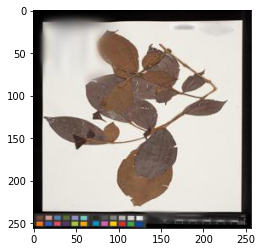

In [33]:
def display_img(img,label):
    print(f"Label : {train_dataset.classes[label]}")
    plt.imshow(img.permute(1,2,0))

#display the first image in the dataset
display_img(*train_dataset[2])


## Visualizing the images:
To visualize images of a single batch, make_grid() can be used from torchvision utilities. It gives us an overall view of images in batch in the form of an image grid.

# ***SplittingDataandPrepareBatches:***
The batch size can be decided according to memory capacity, generally, it takes in power of 2. For example, the batch
size can be 16, 32, 64, 128, 256, etc.
Here I took batches of size 128 and 2679 images from the data for validation and the 34225 of the data for training. The
data set was divided previously in two training and valdation data set. Also I can randomly split the images into training
and testing by PyTorch provides random_split(), that I did not do this here.
The data is divided into batches using the PyTorch DataLoader class. I created two objects train_dl and val_dl for training
and validation data respectively by giving parameters training data and batch size into the DataLoader Class.



In [34]:
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split

batch_size = 128
val_size = len(test_dataset)
train_size = len(train_dataset) - val_size 

train_data,val_data = random_split(train_dataset,[train_size,val_size])
print(f"Length of Train Data : {len(train_dataset)}")
print(f"Length of Validation Data : {len(val_data)}")


Length of Train Data : 257571
Length of Validation Data : 2679


The data is divided into batches using the PyTorch DataLoader class. I created two objects train_dl and val_dl for training and validation data respectively by giving parameters training data and batch size into the DataLoader Class.



In [35]:
#load the train and validation into batches.
train_dl = DataLoader(train_data, batch_size, shuffle = True, num_workers = 4, pin_memory = True)
val_dl = DataLoader(val_data, batch_size*2, num_workers = 4, pin_memory = True)


## Visualizing the images:
To visualize images of a single batch, make_grid() can be used from torchvision utilities. It gives us an overall view of images in batch in the form of an image grid.

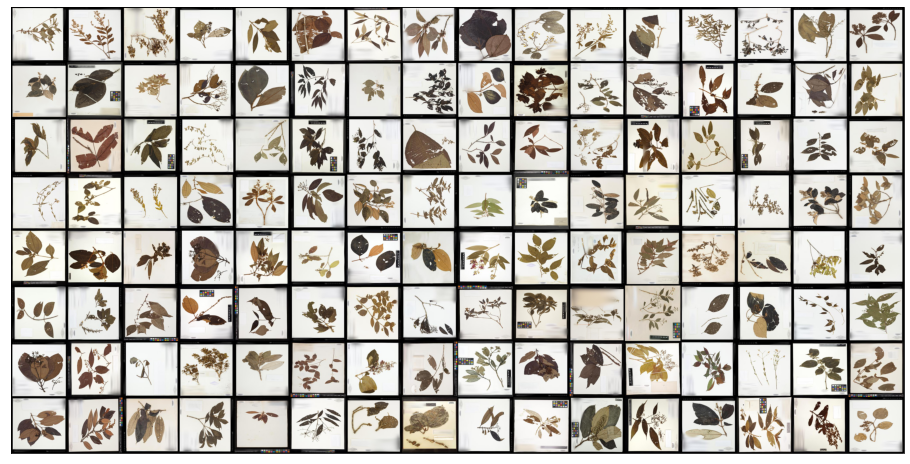

In [36]:
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

def show_batch(dl):
    """Plot images grid of single batch"""
    for images, labels in dl:
        fig,ax = plt.subplots(figsize = (16,20))
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(make_grid(images,nrow=16).permute(1,2,0))
        break
        
show_batch(train_dl)


## CNN from Scratch

I started by define a new class that extends the nn.Module class from PyTorch. This is needed when you want to create a
neural network as it provides you with a bunch of useful methods. I then defined the layers in my neural network. This is
done in the init method of the class. I simply named my layers, and then assigned them to the appropriate layer that I
wanted; e.g., convolutional layer, pooling layer, fully connected layer, etc. The final thing to do was define a forward
method in my class. The purpose of this method is to define the order in which the input data passes through the various
layers.
nn.Conv2d is used to define the convolutional layers. I defined the channels they receive and how much should they
return along with the kernel size. I started from 3 channels, as my images are RGB images. nn.MaxPool2d is a maxpooling layer that just requires the kernel size and the stride, and nn.Linear is the fully connected layer, and nn.ReLU is
the activation function used. In the forward method, I defined the sequence, and, before the fully connected layers, I
reshape the output to match the input to a fully connected layer.


In [37]:
# Creating a CNN class
class ConvNeuralNet(nn.Module):
	#  Determine what layers and their order in CNN object 
    def __init__(self, num_classes):
        super(ConvNeuralNet, self).__init__()
        self.conv_layer1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3)
        self.conv_layer2 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3)
        self.max_pool1 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        
        self.conv_layer3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3)
        self.conv_layer4 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3)
        self.max_pool2 = nn.MaxPool2d(kernel_size = 2, stride = 2)
                
        self.fc1 = nn.Linear(238144, 128)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128, num_classes)
    
    # Progresses data across layers    
    def forward(self, x):
        out = self.conv_layer1(x)
        out = self.conv_layer2(out)
        out = self.max_pool1(out)
        
        out = self.conv_layer3(out)
        out = self.conv_layer4(out)
        out = self.max_pool2(out)
                        
        out = out.reshape(out.size(0), -1)
        
        out = self.fc1(out)
        out = self.relu1(out)
        out = self.fc2(out)
        return out


## Setting Hyperparameters

I started by initializing my model with the number of classes. I then choosed cross-entropy and SGD (Stochastic Gradient Descent) as the loss function and optimizer respectively. There are different choices for these. I also define the variable total_step to make iteration through various batches easier.



In [38]:
# Setting Hyperparameters
model = ConvNeuralNet(num_classes)
model.to(device)

print(model.conv_layer1.weight.device)

# Set Loss function with criterion
criterion = nn.CrossEntropyLoss()

def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))


# Set optimizer with optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay = 0.005, momentum = 0.9)

total_step = len(train_dl)


cpu


## Training

I started by iterating through the number of epochs, and then the batches in my training data, then I converted the images and the labels according to the device I used, i.e., GPU or CPU In the forward pass I made predictions using my model and calculated loss based on those predictions and omy actual labels. Next, I did the backward pass where I actually updated the weights to improve the model, then set the gradients to zero before every update using optimizer.zero_grad() function. Then, I calculated the new gradients using the loss.backward() function, and finally, I updated the weights with the optimizer.step() function.

As you can see, the loss is slightly decreasing with more and more epochs. This is a good sign.




In [41]:
# Trainning:
# We use the pre-defined number of epochs to determine how many iterations to train the network on

Lossarr = []
Accarr = []
for epoch in range(num_epochs):
    # Load in the data in batches using the train_loader object
    sumloss = 0
    sumacc = 0
    for i, (images, labels) in enumerate(train_dl):
        # Move tensors to the configured device
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        #print(loss.item())
        sumloss = (sumloss + loss)
        averageloss = sumloss / train_dl.__len__()
        
        acc = accuracy(outputs, labels)
        #print(acc.item())
        sumacc = (sumacc + acc)
        averageacc = sumacc / train_dl.__len__()


        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        #print(loss.backward())
        optimizer.step()

    Lossarr.append(averageloss.item())
    #print(Lossarr)
    Accarr.append(averageacc.item())
    #print(Accarr)
    print('Epoch [{}/{}], Loss: {:.4f}, acc: {:.4f}, averageloss: {:.4f}, averageacc: {:.4f} '.format(epoch+1, num_epochs, loss.item(), acc.item(), averageloss.item(), averageacc.item()))


KeyboardInterrupt: ignored

## Testing
Now I tested my model. The code for testing is not so different from training, with the exception of calculating the gradients as we are not updating any weights:




In [ ]:
# Testing:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in train_dl:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the {} train images: {} %'.format(257571, 100 * correct / total))



In [ ]:
# Testing:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in val_dl:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        loss = criterion(outputs, labels)
        #print(loss.item())
        sumloss = (sumloss + loss)
        averageloss = sumloss / train_dl.__len__()
        
        acc = accuracy(outputs, labels)
        #print(acc.item())
        sumacc = (sumacc + acc)
        averageacc = sumacc / train_dl.__len__()

    print('Accuracy of the network on the {} train images: {} %'.format(257571, 100 * correct / total))



I wrap the code inside torch.no_grad() as there is no need to calculate any gradients. We then predict each batch using the model and calculate how many it predicts correctly. I got the final result of ~20% accuracy.


# ***Analysis the Model***

Visualization of the performance of any machine learning model is an easy way to make sense of the data being poured out of the model and make an informed decision about the changes that need to be made on the parameters or hyperparameters that affects the Machine Learning model.

I use the plot the training loss and trainning accuracy base on the numbers of Epochs to make a visual analysis on this model. 

**1- Loss Curve:**

One of the most used plots to analyse a neural network is a Loss curve during training. It gives us a snapshot of the training process and the direction in which the network learns.
This plot logs the loss after every Epoch. During an epoch, the loss function is calculated across every data items and it is guaranteed to give the quantitative loss measure at the given epoch.

In [ ]:
#Plot Training loss
import numpy as np
import matplotlib.pyplot as plt
 
x = np.array(range(0,num_epochs))
y = np.array(Lossarr)
plt.title("Plotting 1-D array")
plt.xlabel("Number of Epochs")
plt.ylabel("Trainnig Loss")
plt.plot(x, y, color = "green", marker = "o", label = "Array elements")
plt.legend()
plt.show()

**2- Accuracy Curve:**

Another most used curves to understand the progress of Neural Networks is an Accuracy curve. Here again plot logs the loss after every Epoch.

In [ ]:
#Plot Training Accuracy
import numpy as np
import matplotlib.pyplot as plt
 
x = np.array(range(0,num_epochs))
y = np.array(Accarr)
plt.title("Plotting 1-D array")
plt.xlabel("Number of Epochs")
plt.ylabel("Trainnig Acc")
plt.plot(x, y, color = "cyan", marker = "o", label = "Array elements")
plt.legend()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
 
  
# creating the dataset

Epochs = np.array(range(0,num_epochs))
LossPlot = np.array(Lossarr)
  
fig = plt.figure(figsize = (20, 10))
 
# creating the bar plot
plt.bar(Epochs, LossPlot, color ='maroon',
        width = 0.4)
 
plt.xlabel("Number of Epochs")
plt.ylabel("Trainnig Loss")
plt.title("Training Loss Average per Epochs")
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
 
  
# creating the dataset

Epochs = np.array(range(0,num_epochs))
AccPlot = np.array(Accarr)
  
fig = plt.figure(figsize = (20, 10))
 
# creating the bar plot
plt.bar(Epochs, AccPlot, color ='maroon',
        width = 0.4)
 
plt.xlabel("Number of Epochs")
plt.ylabel("Trainnig Accuracy")
plt.title("Training Accuracy Average per Epochs")
plt.show()

In [ ]:
%cd /content/drive/MyDrive/Herbarium Data-2019

/content/drive/MyDrive/Herbarium Data-2019


In [ ]:
!tar xzvf small-train.tar.gz

Streaming output truncated to the last 5000 lines.
small-train/628/00052.jpg
small-train/628/00053.jpg
small-train/628/00054.jpg
small-train/628/00055.jpg
small-train/628/00056.jpg
small-train/628/00057.jpg
small-train/628/00058.jpg
small-train/628/00059.jpg
small-train/628/00060.jpg
small-train/628/00061.jpg
small-train/628/00062.jpg
small-train/628/00063.jpg
small-train/628/00064.jpg
small-train/628/00065.jpg
small-train/628/00066.jpg
small-train/628/00067.jpg
small-train/628/00068.jpg
small-train/628/00069.jpg
small-train/628/00070.jpg
small-train/628/00071.jpg
small-train/628/00072.jpg
small-train/628/00073.jpg
small-train/628/00074.jpg
small-train/628/00075.jpg
small-train/628/00076.jpg
small-train/628/00077.jpg
small-train/628/00078.jpg
small-train/628/00079.jpg
small-train/628/00080.jpg
small-train/628/00081.jpg
small-train/628/00082.jpg
small-train/628/00083.jpg
small-train/628/00084.jpg
small-train/628/00085.jpg
small-train/628/00086.jpg
small-train/628/00087.jpg
small-train/6